In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector


# Simulate LFP with Ripple

In [3]:
from ripple_detection.simulate import simulate_time, brown
import scipy.stats

SAMPLING_FREQUENCY = 1500
n_samples = SAMPLING_FREQUENCY * 3
time = simulate_time(n_samples, SAMPLING_FREQUENCY)
brown_noise = brown(time.shape[0])
RIPPLE_FREQUENCY = 200
ripple_signal = np.sin(2 * np.pi * time * RIPPLE_FREQUENCY)
carrier = scipy.stats.norm(loc=1.05, scale=0.100 / 6).pdf(time)
carrier /= carrier.max()


(0.9, 1.2)

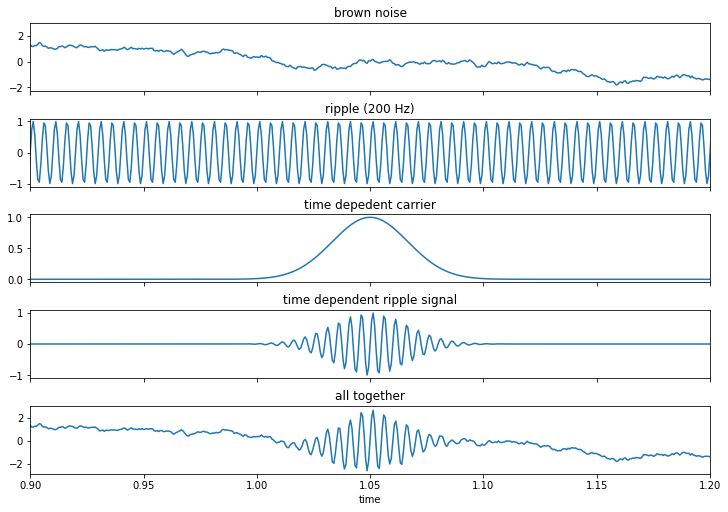

In [4]:
f, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 7), constrained_layout=True)
ax[0].plot(time, brown_noise)
ax[0].set_title("brown noise")
ax[1].plot(time, ripple_signal)
ax[1].set_title("ripple (200 Hz)")
ax[2].plot(time, carrier)
ax[2].set_title("time depedent carrier")
ax[3].plot(time, (ripple_signal * carrier))
ax[3].set_title("time dependent ripple signal")
ax[4].plot(time, 5 / 2 * (ripple_signal * carrier) + brown_noise)
ax[4].set_title("all together")
ax[4].set_xlabel("time")

plt.xlim(0.9, 1.2)


## Test Ripple Detectors
#### Single LFP
Simulate a single LFP with ripples at time 1.1 and time 2.1

This is with brown noise $\frac{1}{f^2}$

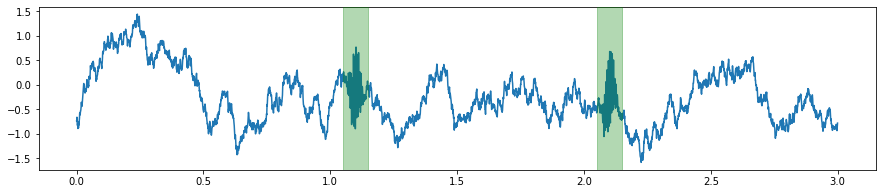

In [5]:
from ripple_detection.simulate import simulate_LFP

true_ripple_midtime = [1.1, 2.1]
RIPPLE_DURATION = 0.100
lfps = simulate_LFP(
    time, true_ripple_midtime, noise_amplitude=1.2, ripple_amplitude=1.5
)[:, np.newaxis]
speed = np.ones_like(time)

fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(time, lfps)


for midtime in true_ripple_midtime:
    plt.axvspan(
        midtime - RIPPLE_DURATION / 2,
        midtime + RIPPLE_DURATION / 2,
        alpha=0.3,
        color="green",
        zorder=1000,
    )


,start_time,end_time
ripple_number,,
1,1.061333,1.138000
2,2.064000,2.142667


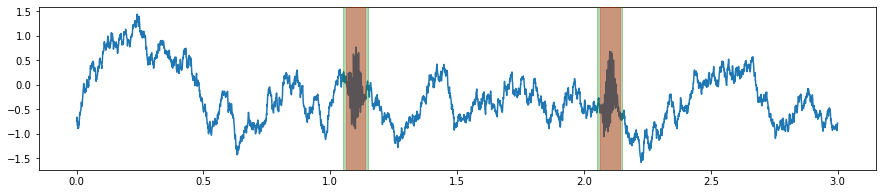

In [6]:
from ripple_detection import filter_ripple_band

filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)

for midtime in true_ripple_midtime:
    ax.axvspan(
        midtime - RIPPLE_DURATION / 2,
        midtime + RIPPLE_DURATION / 2,
        alpha=0.3,
        color="green",
        zorder=9,
    )

for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=10)


,start_time,end_time
ripple_number,,
1,1.060000,1.138667
2,2.062667,2.142667


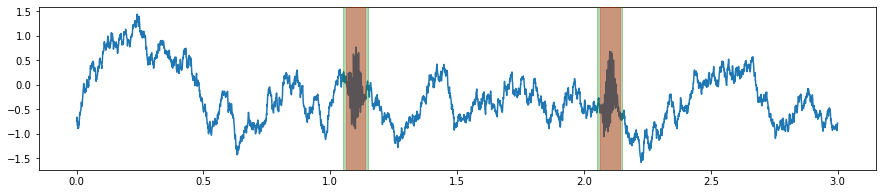

In [7]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)


for midtime in true_ripple_midtime:
    ax.axvspan(
        midtime - RIPPLE_DURATION / 2,
        midtime + RIPPLE_DURATION / 2,
        alpha=0.3,
        color="green",
        zorder=9,
    )

for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


### Two LFPs

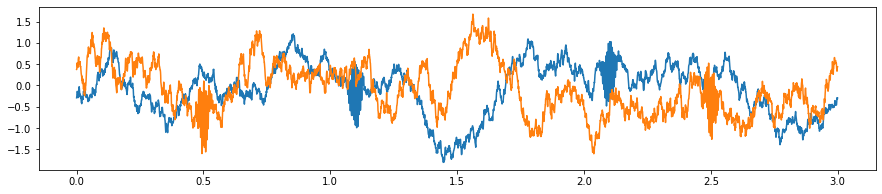

In [8]:
lfps = np.stack(
    (
        simulate_LFP(time, [1.1, 2.1], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [0.5, 2.5], noise_amplitude=1.2, ripple_amplitude=1.5),
    ),
    axis=1,
)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
speed = np.ones_like(time)


,start_time,end_time
ripple_number,,
1,0.456000,0.538000
2,1.061333,1.136000
3,2.059333,2.143333
4,2.458667,2.534667


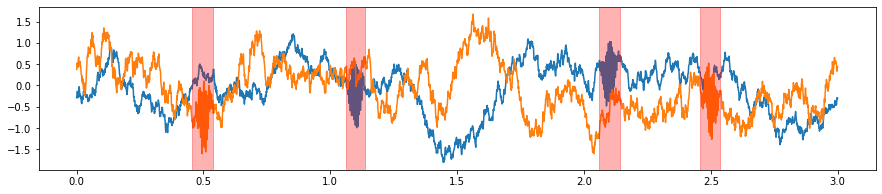

In [9]:
filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


,start_time,end_time
ripple_number,,
1,0.465333,0.536667
2,1.063333,1.134667
3,2.061333,2.139333
4,2.460667,2.534000


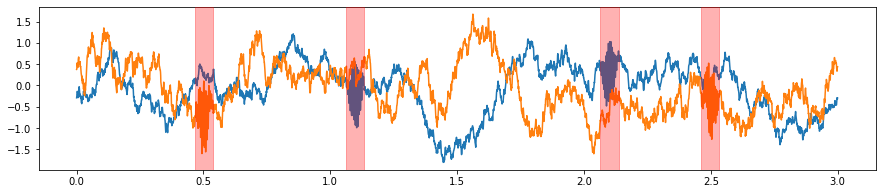

In [10]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


## Two LFPs with close ripples

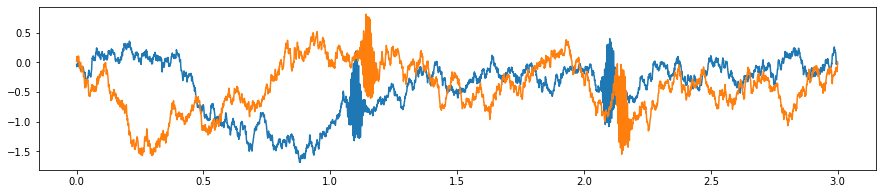

In [11]:
lfps = np.stack(
    (
        simulate_LFP(time, [1.100, 2.100], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [1.150, 2.150], noise_amplitude=1.2, ripple_amplitude=1.5),
    ),
    axis=1,
)

fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(time, lfps)
speed = np.ones_like(time)


,start_time,end_time
ripple_number,,
1,1.058000,1.190667
2,2.059333,2.189333


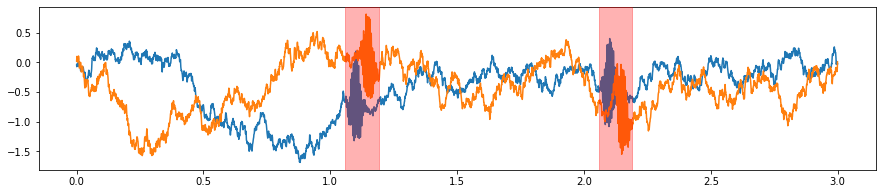

In [12]:
filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


,start_time,end_time
ripple_number,,
1,1.061333,1.188667
2,2.062667,2.188000


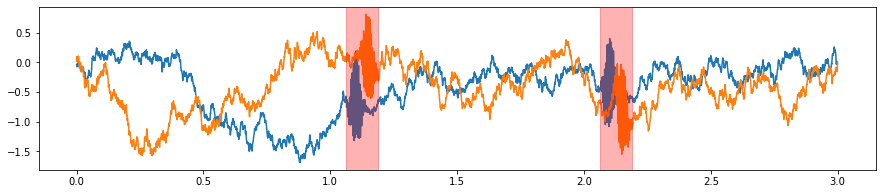

In [13]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


## Many LFPs, only two LFPs with ripples

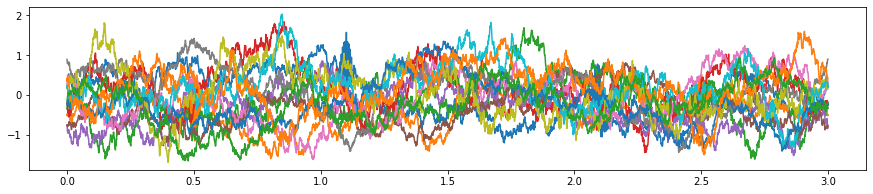

In [14]:
lfps = np.stack(
    (
        simulate_LFP(time, [1.1, 2.1], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [0.5, 2.5], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.2, ripple_amplitude=1.5),
    ),
    axis=1,
)
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
speed = np.ones_like(time)


,start_time,end_time
ripple_number,,
1,0.456667,0.547333
2,1.060000,1.191333
3,2.065333,2.139333
4,2.459333,2.550667


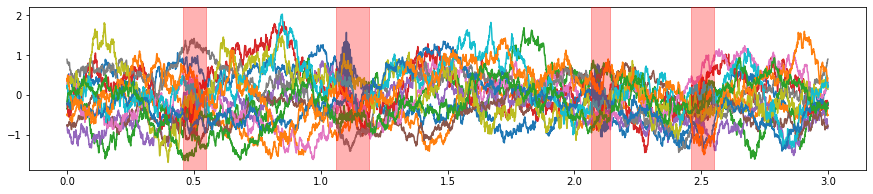

In [15]:
filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


,start_time,end_time
ripple_number,,
1,0.464667,0.536667
2,1.067333,1.135333
3,2.068000,2.134667
4,2.457333,2.534000


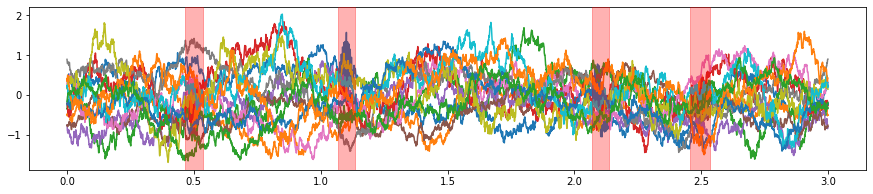

In [16]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


## Two LFPs but speed criterion is not met for second ripple

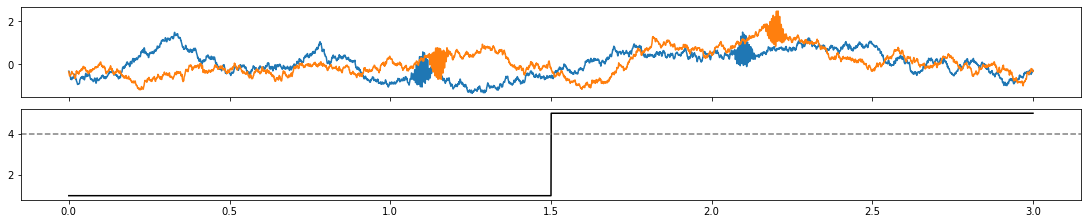

In [17]:
lfps = np.stack(
    (
        simulate_LFP(time, [1.1, 2.1], noise_amplitude=1.2, ripple_amplitude=1.5),
        simulate_LFP(time, [1.15, 2.2], noise_amplitude=1.2, ripple_amplitude=1.5),
    ),
    axis=1,
)


speed = np.ones_like(time)
speed[time > 1.5] = 5

fig, axes = plt.subplots(2, 1, figsize=(15, 3), sharex=True, constrained_layout=True)
axes[0].plot(time, lfps)
axes[1].plot(time, speed, color="black")
axes[1].axhline(4, color="grey", linestyle="--")


,start_time,end_time
ripple_number,,
1,1.057333,1.190667


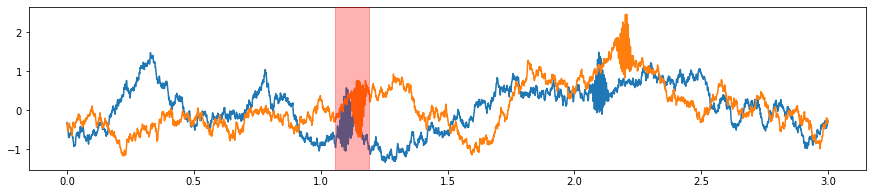

In [18]:
filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


,start_time,end_time
ripple_number,,
1,1.061333,1.187333


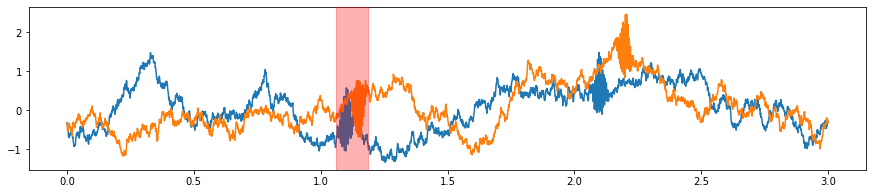

In [19]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


## Ripple but duration is too short

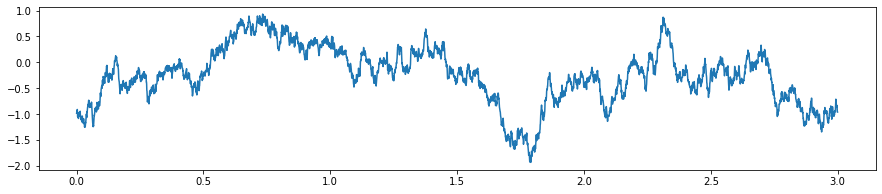

In [20]:
lfps = np.stack(
    (
        simulate_LFP(
            time,
            [1.1, 2.1],
            noise_amplitude=1.2,
            ripple_amplitude=1.5,
            ripple_duration=0.001,
        ),
    ),
    axis=1,
)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
speed = np.ones_like(time)


,start_time,end_time
ripple_number,,


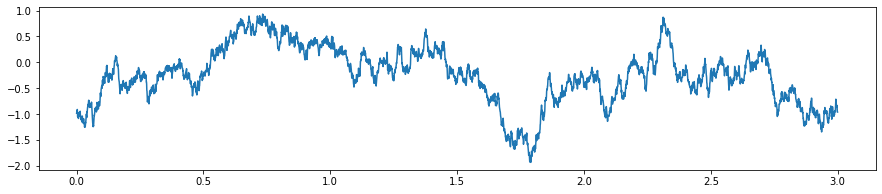

In [21]:
filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


,start_time,end_time
ripple_number,,
1,1.736000,1.823333
2,2.583333,2.610667


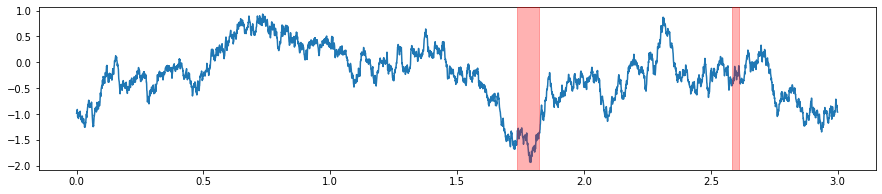

In [22]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


### NO ripple

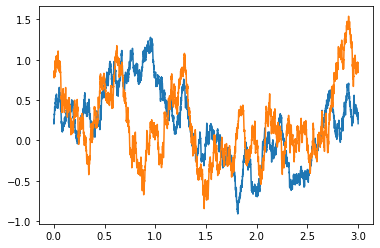

In [23]:
lfps = np.stack(
    (
        simulate_LFP(time, [], noise_amplitude=1.0, ripple_amplitude=1.5),
        simulate_LFP(time, [], noise_amplitude=1.0, ripple_amplitude=1.5),
    ),
    axis=1,
)
plt.plot(time, lfps)
speed = np.ones_like(time)


,start_time,end_time
ripple_number,,


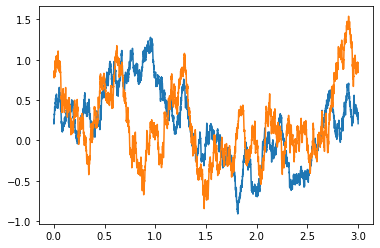

In [24]:
filtered_lfps = filter_ripple_band(lfps)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, lfps)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)


,start_time,end_time
ripple_number,,
1,0.223333,0.264


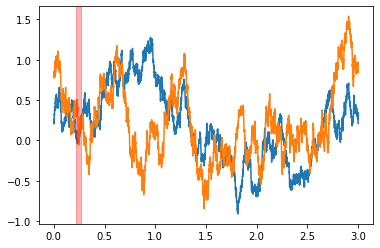

In [25]:
Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, lfps)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)
